In [0]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

In [0]:
def BlackScholes(S,K,r,sigma,T):
  d1 = (np.log(S/K)+(r+0.5*sigma**2))/sigma*np.sqrt(T)
  d2 = d1 - sigma* np.sqrt(T)
  return(S*norm.cdf(d1)-K*np.exp(-r*T)*norm.cdf(d2))

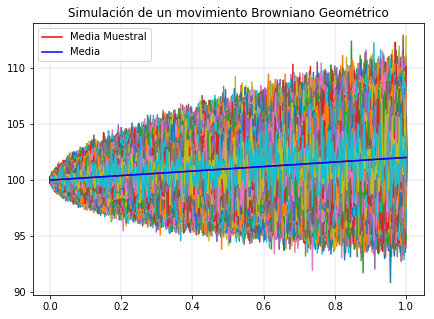

In [13]:
T = 1
N = 365 * T
sigma = 0.02
r= 0.02
t = np.linspace(T/N,T,N)
nSims = 100000
S0=100

Sims = np.random.normal(0,1,(nSims,N))
Asset=S0*np.exp((r-0.5*sigma**2)*t+sigma*np.sqrt(t)*Sims)

plt.figure(figsize=(7,5))
plt.plot(t,Asset.transpose());
plt.plot(t,np.mean(Asset,axis=0),'r-',label='Media Muestral', markersize=1)
plt.plot(t,S0*np.exp(r*t).transpose(),'b-',label='Media', markersize=1);
plt.grid(color='b', linestyle='-', linewidth=.1);
plt.title('Simulación de un movimiento Browniano Geométrico')
plt.legend(loc=0);

In [6]:
BlackScholes(S0,100,r,sigma,T)

63.21205588285667

In [7]:
#European Option
np.mean(np.maximum(Asset[:,-1]-100,0))*np.exp(-r*T)

62.40235736047821

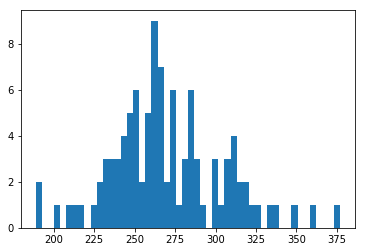

In [8]:
plt.hist(Asset[:,-1],bins=50);

In [9]:
#Asian Option
np.mean(np.maximum(np.mean(Asset,axis=0)-100,0))*np.exp(-r*T)


26.4263975050941

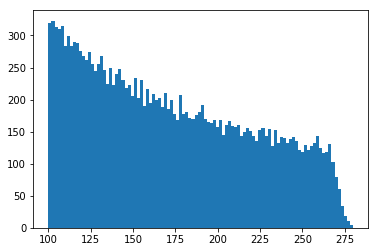

In [10]:
plt.hist(np.mean(Asset,axis=0),bins=100);

In [11]:
#Lookback Option
np.mean(np.maximum(np.max(Asset,axis=0)-100,0))*np.exp(-r*T)

44.98570607681139

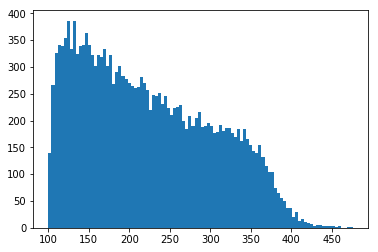

In [12]:
plt.hist(np.max(Asset,axis=0),bins=100);